# CS5242

## Load Data

In [ ]:
from data import Data

train_data = Data(data_type='train')
test_data = Data(data_type='test')

print("Train data: x:"+ str(train_data.x.shape)+ ' y:'+str(train_data.y.shape))
print("Test data: x:"+ str(test_data.x.shape)+ ' y:'+str(test_data.y.shape))



Loading train data 18662/18662: 100%|█████████████████████████████████████████████████████████████ [ time left: 00:00 ]
Loading test data 748/6051:  12%|████████                                                          [ time left: 00:05 ]

## Model

In [2]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

## Save Checkpoint

In [27]:
import os
# Directory where the checkpoints will be saved
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)

In [28]:
history = model.fit(x=train_data.x, y=train_data.y, validation_split=0.1, epochs=30, callbacks=[checkpoint_callback], verbose=2)

Train on 16795 samples, validate on 1867 samples
Epoch 1/30
16795/16795 [==============================] - ETA: 23:07 - loss: 0.6991 - accuracy: 0.625 - ETA: 11:52 - loss: 0.7050 - accuracy: 0.578 - ETA: 8:09 - loss: 0.6954 - accuracy: 0.614 - ETA: 6:15 - loss: 0.6949 - accuracy: 0.58 - ETA: 5:07 - loss: 0.6893 - accuracy: 0.61 - ETA: 4:22 - loss: 0.6872 - accuracy: 0.60 - ETA: 3:49 - loss: 0.6839 - accuracy: 0.61 - ETA: 3:25 - loss: 0.6819 - accuracy: 0.62 - ETA: 3:05 - loss: 0.6824 - accuracy: 0.62 - ETA: 2:50 - loss: 0.6786 - accuracy: 0.64 - ETA: 2:38 - loss: 0.6772 - accuracy: 0.64 - ETA: 2:27 - loss: 0.6728 - accuracy: 0.65 - ETA: 2:18 - loss: 0.6708 - accuracy: 0.65 - ETA: 2:11 - loss: 0.6689 - accuracy: 0.64 - ETA: 2:04 - loss: 0.6693 - accuracy: 0.64 - ETA: 1:58 - loss: 0.6660 - accuracy: 0.65 - ETA: 1:53 - loss: 0.6614 - accuracy: 0.66 - ETA: 1:49 - loss: 0.6595 - accuracy: 0.66 - ETA: 1:45 - loss: 0.6561 - accuracy: 0.67 - ETA: 1:41 - loss: 0.6509 - accuracy: 0.67 - ETA: 1:3

## Plot Training History

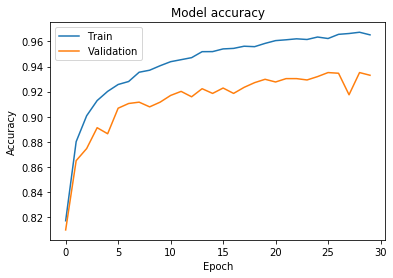

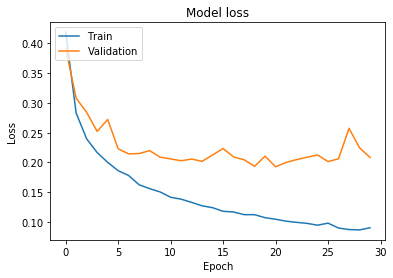

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Model Summary

In [30]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_4 (Bidirection multiple                  85504     
_________________________________________________________________
dense_8 (Dense)              multiple                  8256      
_________________________________________________________________
dense_9 (Dense)              multiple                  65        
Total params: 93,825
Trainable params: 93,825
Non-trainable params: 0
_________________________________________________________________


## Restore Weights

In [3]:
checkpoint_dir = './training_checkpoints'
model.load_weights(tf.train.latest_checkpoint(checkpoint_dir))

In [4]:
test_predict = model.predict(test_data.x)

In [5]:
print(test_predict.shape)

(6051, 1)


## Save Prediction to CSV

In [6]:
import csv

output_file = 'result.csv'
with open(output_file, 'wt', newline='', encoding='utf-8') as output_file:
    csv_writer = csv.writer(output_file)
    csv_writer.writerow(('Id', 'Predicted'))
    for id, predict in enumerate(test_predict):
        csv_writer.writerow((id, predict[0]))